<a href="https://www.kaggle.com/code/mosesmoncy/fuel-efficiency-prediction?scriptVersionId=128203750" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


In recent years, there has been a growing interest in developing more fuel-efficient vehicles as a way to reduce carbon emissions and save on fuel costs. Machine learning and regression models are playing an increasingly important role in predicting fuel efficiency, helping automakers to design more fuel-efficient cars.

To create a fuel efficiency prediction model using machine learning and regression analysis, data is first collected on various vehicle characteristics, such as engine size, weight, and aerodynamics. This data is then used to train the machine learning algorithm, which analyzes the data and creates a model that can accurately predict fuel efficiency based on these variables.

Here the model will predict 'refill-gas' using Regression Models.

In [1]:
import numpy as np 
import pandas as pd

In [2]:
#Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import seaborn as sns
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
a=pd.read_csv('/kaggle/input/efficiency-dataset/measurements.csv')
a

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [4]:
# read first five data

a.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [5]:
# read last five data

a.tail()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN
387,"14,7",5,25,25,30,AC,SP98,1,0,0,NaN,NaN


In [6]:
a.shape

(388, 12)

In [7]:
a.describe

<bound method NDFrame.describe of     distance consume  speed temp_inside  temp_outside specials gas_type  AC  \
0         28       5     26        21,5            12      NaN      E10   0   
1         12     4,2     30        21,5            13      NaN      E10   0   
2       11,2     5,5     38        21,5            15      NaN      E10   0   
3       12,9     3,9     36        21,5            14      NaN      E10   0   
4       18,5     4,5     46        21,5            15      NaN      E10   0   
..       ...     ...    ...         ...           ...      ...      ...  ..   
383       16     3,7     39        24,5            18      NaN     SP98   0   
384     16,1     4,3     38          25            31       AC     SP98   1   
385       16     3,8     45          25            19      NaN     SP98   0   
386     15,4     4,6     42          25            31       AC     SP98   1   
387     14,7       5     25          25            30       AC     SP98   1   

     rain  sun re

In [8]:
a.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [9]:
a.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [10]:
a['refill gas'].value_counts()

SP98    8
E10     5
Name: refill gas, dtype: int64

In [11]:
a['refill liters'].value_counts()

45      2
37,7    2
39      2
37,6    1
38      1
38,3    1
10      1
41      1
37      1
37,2    1
Name: refill liters, dtype: int64

In [12]:
a['specials'].value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

In [13]:
# replacing 'refill gas' with SP98=1 and E10=2

a['refill gas']=a['refill gas'].map({'SP98':1,'E10':2})
a['refill liters']=a['refill liters'].map({'37,7':37.7,'37,6':37.6,'38,3':38.3,'37,2':37.2})

In [14]:
a

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,NaN,2.0
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [15]:
a.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    383
refill gas       375
dtype: int64

In [16]:
a.dtypes

distance          object
consume           object
speed              int64
temp_inside       object
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas       float64
dtype: object

In [17]:
a.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

In [18]:
# using labelEncoding for categorical data


from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()

cols=['distance', 'consume','temp_inside','specials','gas_type']
a[cols]=a[cols].apply(la.fit_transform)

In [19]:
a.dtypes

distance           int64
consume            int64
speed              int64
temp_inside        int64
temp_outside       int64
specials           int64
gas_type           int64
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas       float64
dtype: object

In [20]:
#Taking an overview of data
a.sample(10)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
123,37,24,24,7,8,12,1,0,0,0,NaN,NaN
224,25,19,34,6,8,8,1,0,1,0,NaN,NaN
372,119,7,47,5,26,12,1,0,0,0,NaN,NaN
149,127,16,52,4,5,12,0,0,0,0,NaN,NaN
69,14,13,37,4,4,0,1,1,0,0,NaN,NaN
127,160,11,46,9,2,12,1,0,0,0,NaN,NaN
201,89,6,42,13,15,12,1,0,0,0,NaN,NaN
175,139,12,44,3,3,12,0,0,0,0,NaN,NaN
122,96,14,55,7,3,12,1,0,0,0,NaN,NaN
85,19,30,58,1,11,8,1,0,1,0,NaN,NaN


In [21]:
a.isna().sum()

distance           0
consume            0
speed              0
temp_inside        0
temp_outside       0
specials           0
gas_type           0
AC                 0
rain               0
sun                0
refill liters    383
refill gas       375
dtype: int64

In [22]:
# replcing missing values with mean() for refill litres and refill gas

a['refill liters']=a['refill liters'].fillna(a['refill liters'].mean())
a['refill gas']=a['refill gas'].fillna(a['refill gas'].mean())

In [23]:
a.isna().sum()

distance         0
consume          0
speed            0
temp_inside      0
temp_outside     0
specials         0
gas_type         0
AC               0
rain             0
sun              0
refill liters    0
refill gas       0
dtype: int64

In [24]:
#Lets find out the number of cars in each refill gas category
a['refill gas'].value_counts().sort_index()

1.000000      8
1.384615    375
2.000000      5
Name: refill gas, dtype: int64

In [25]:
fig = {
  "data": [
    {
      "values": [1.000000,1.384615,2.000000],
      "labels": [
        'SP98',
        'SP98 or E10',
        "E10"
        
      ],
      "domain": {"column": 0},
      "name": "Fuel Effeiciency",
      "hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    }],
  "layout": {
        "title":"Distribution of 'refill gas'",
        "grid": {"rows": 1, "columns": 1},
        "annotations": [
            {
                "font": {
                    "size": 36
                },
                "showarrow": False,
                "text": "",
                "x": 0.5,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='cars_donut')

In [26]:
a.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

<AxesSubplot:xlabel='refill gas', ylabel='Count'>

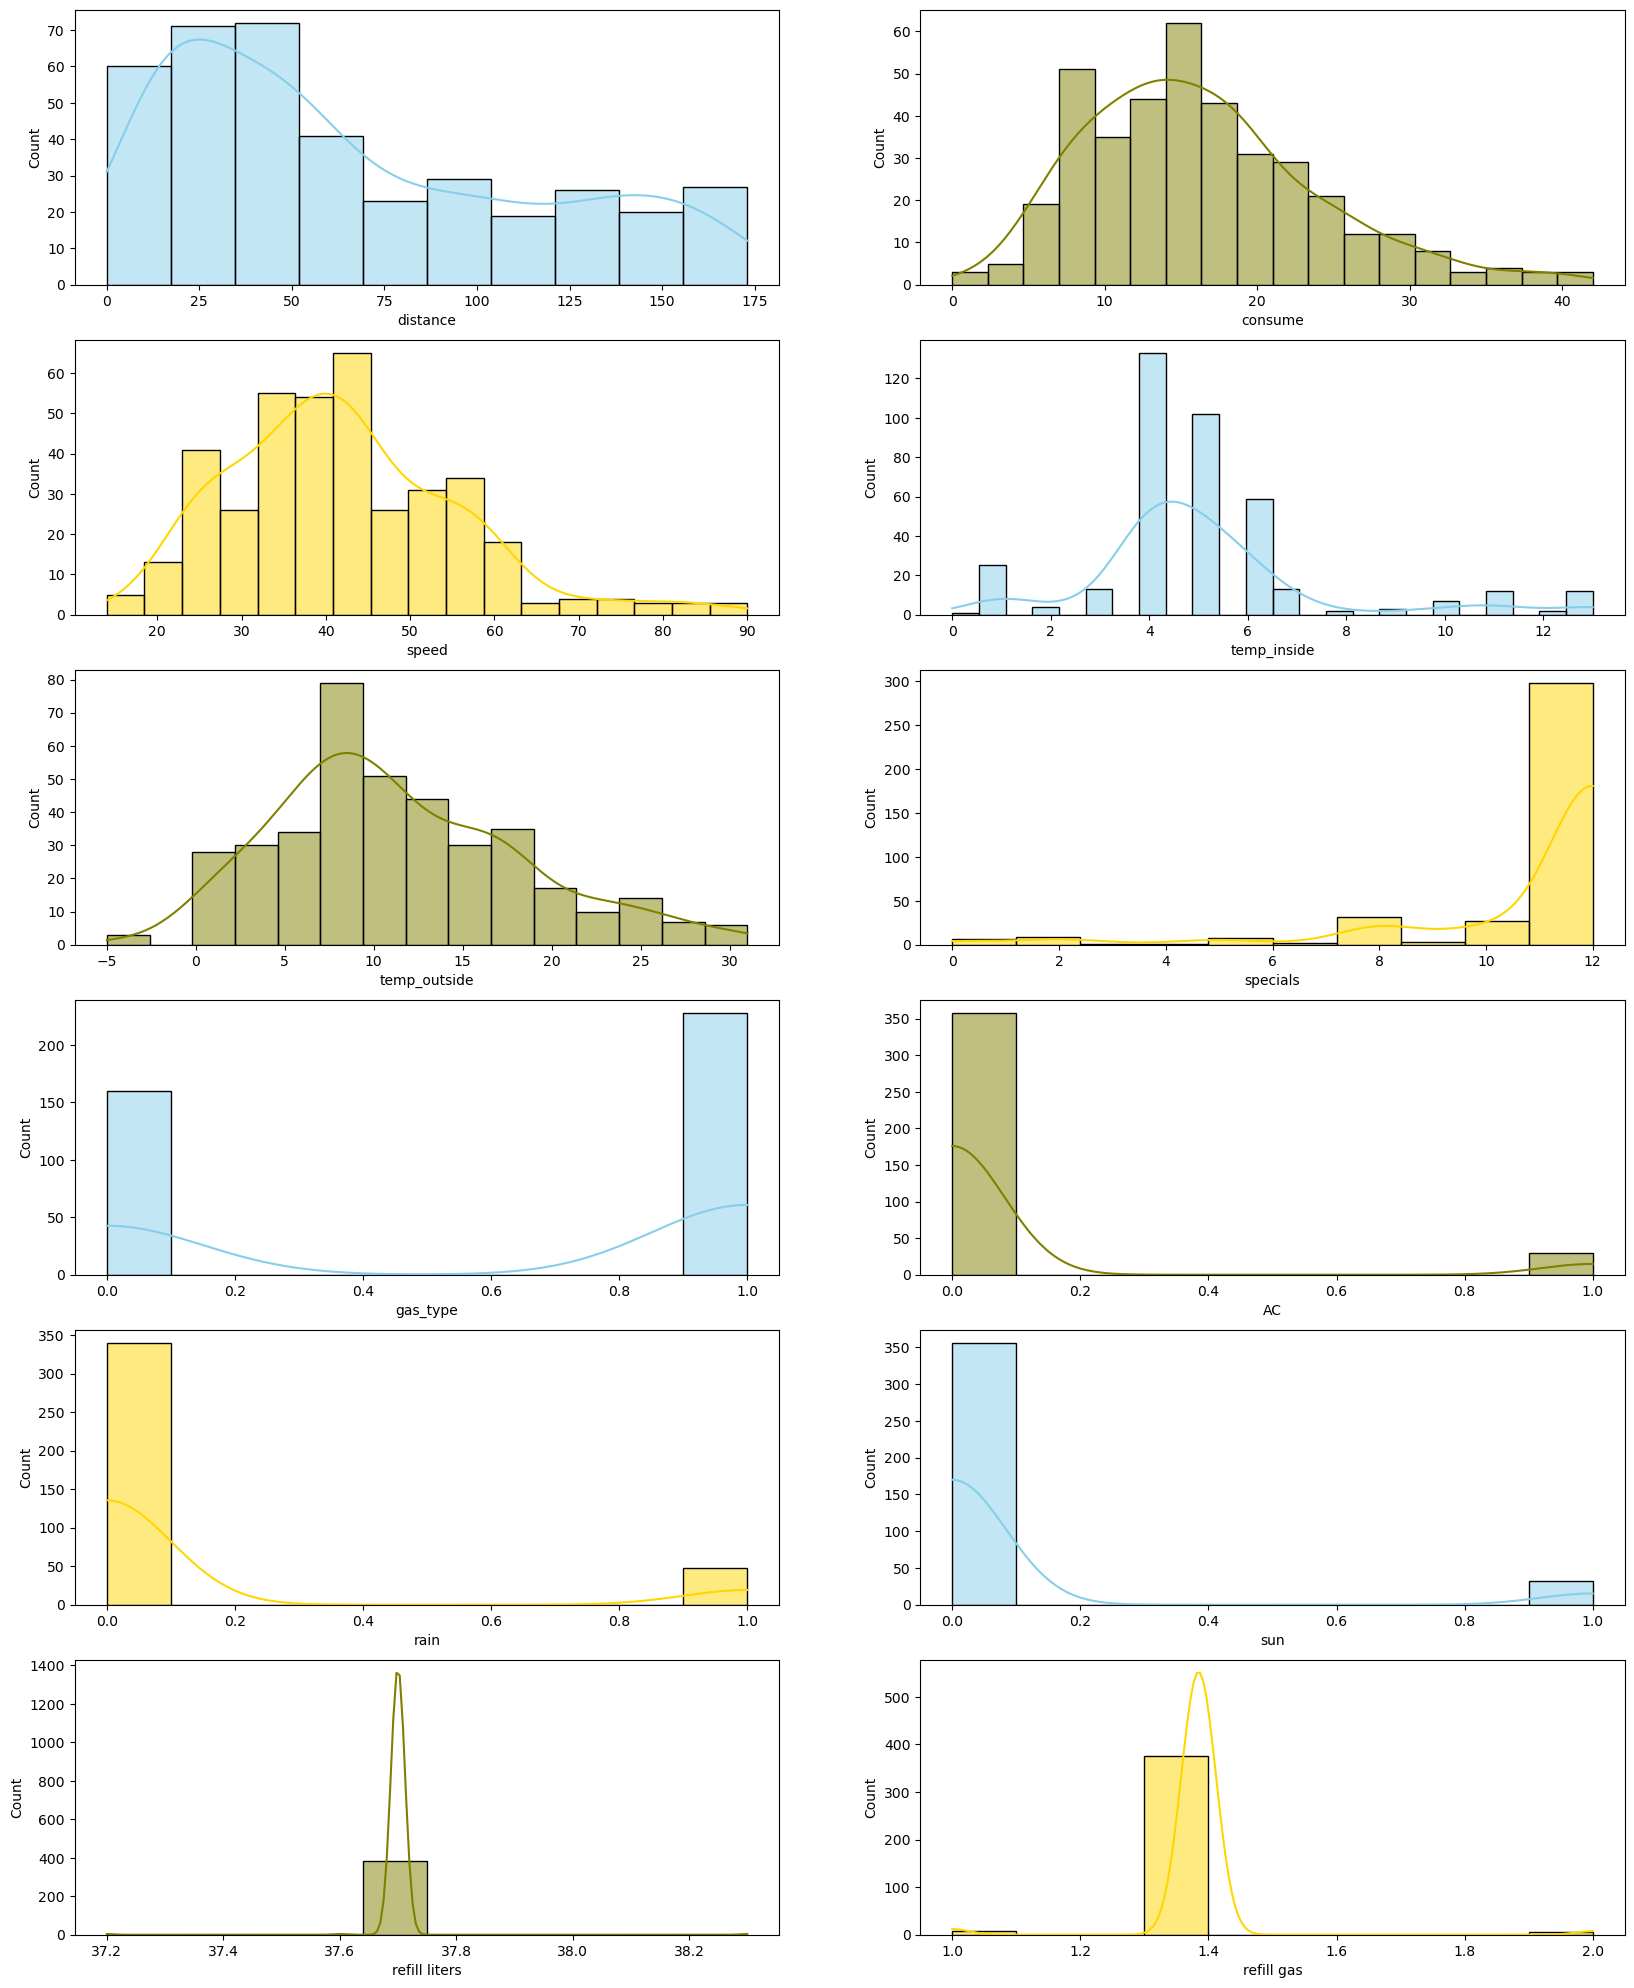

In [27]:
fig, axs = plt.subplots(6, 2, figsize=(20, 25))

sns.histplot(data=a['distance'], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=a['consume'], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=a['speed'], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=a['temp_inside'], kde=True, color="skyblue", ax=axs[1, 1])
sns.histplot(data=a['temp_outside'], kde=True, color="olive", ax=axs[2, 0])
sns.histplot(data=a['specials'], kde=True, color="gold", ax=axs[2, 1])
sns.histplot(data=a['gas_type'], kde=True, color="skyblue", ax=axs[3, 0])
sns.histplot(data=a['AC'], kde=True, color="olive", ax=axs[3, 1])
sns.histplot(data=a['rain'], kde=True, color="gold", ax=axs[4, 0])
sns.histplot(data=a['sun'], kde=True, color="skyblue", ax=axs[4, 1])
sns.histplot(data=a['refill liters'], kde=True, color="olive", ax=axs[5, 0])
sns.histplot(data=a['refill gas'], kde=True, color="gold", ax=axs[5, 1])

In [28]:
a.shape

(388, 12)

In [29]:
a

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,107,18,26,4,12,12,0,0,0,0,37.7,2.000000
1,16,10,30,4,13,12,0,0,0,0,37.7,1.384615
2,9,23,38,4,15,12,0,0,0,0,37.7,1.384615
3,25,7,36,4,14,12,0,0,0,0,37.7,1.384615
4,65,13,46,4,15,12,0,0,0,0,37.7,1.384615
...,...,...,...,...,...,...,...,...,...,...,...,...
383,46,5,39,10,18,12,1,0,0,0,37.7,1.384615
384,47,11,38,11,31,0,1,1,0,0,37.7,1.384615
385,46,6,45,11,19,12,1,0,0,0,37.7,1.384615
386,42,14,42,11,31,0,1,1,0,0,37.7,1.384615


In [30]:
features = a.iloc[:,:-1]
features[:10]
a1=[]
for i in features:
    a1.append(features[i].value_counts())

In [31]:
a.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

In [32]:
dt = pd.crosstab(a['distance'], a['refill gas'])
cs = pd.crosstab(a['consume'], a['refill gas'])
spd = pd.crosstab(a['speed'], a['refill gas'])
t_i = pd.crosstab(a['temp_inside'], a['refill gas'])
t_o = pd.crosstab(a['temp_outside'], a['refill gas'])
spe = pd.crosstab(a['specials'], a['refill gas'])
gas = pd.crosstab(a['gas_type'], a['refill gas'])
ac = pd.crosstab(a['AC'], a['refill gas'])
rain = pd.crosstab(a['rain'], a['refill gas'])
sun = pd.crosstab(a['sun'], a['refill gas'])
rfl = pd.crosstab(a['refill liters'], a['refill gas'])


In [33]:
a['refill liters'].value_counts()

37.7    385
37.6      1
38.3      1
37.2      1
Name: refill liters, dtype: int64

In [34]:
# 'SP98':1,'E10':2

In [35]:
sun

refill gas,1.000000,1.384615,2.000000
sun,,,
0,8,343,5
1,0,32,0


In [36]:
data = [
    go.Bar(
        x=a1[0].index, 
        y=rain[1.000000],
        name='SP98'
    ),
    go.Bar(
        x=a1[0].index,
        y=rain[2.000000],
        name='E10'
    )

]

layout = go.Layout(
    barmode='stack',
    title='Rain vs Refill Gas'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='distri')

In [37]:
data = [
    go.Bar(
        x=a1[0].index, 
        y=ac[1.000000],
        name='SP98'
    ),
    go.Bar(
        x=a1[0].index,
        y=ac[2.000000],
        name='E10'
    )

]

layout = go.Layout(
    barmode='stack',
    title='AC vs Refill Gas'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='distri')

In [38]:
data = [
    go.Bar(
        x=a1[0].index, 
        y=gas[1.000000],
        name='SP98'
    ),
    go.Bar(
        x=a1[0].index,
        y=gas[2.000000],
        name='E10'
    )

]

layout = go.Layout(
    barmode='stack',
    title='Gas Type vs Refill Gas'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='distri')

In [39]:
data = [
    go.Bar(
        x=a1[0].index, 
        y=sun[1.000000],
        name='SP98'
    ),
    go.Bar(
        x=a1[0].index,
        y=sun[2.000000],
        name='E10'
    )

]

layout = go.Layout(
    barmode='stack',
    title='Sun vs Refill Gas'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='distri')

1.384615    375
1.000000      8
2.000000      5
Name: refill gas, dtype: int64


<AxesSubplot:>

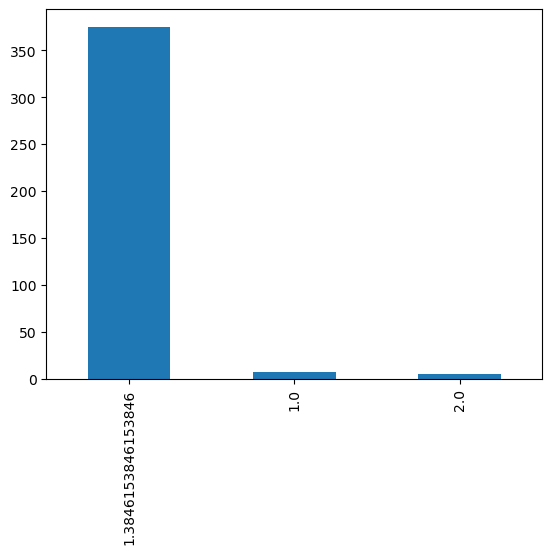

In [40]:
# plot a bar Chart for 'refill gas'

a_rg = a['refill gas'].value_counts()
print(a_rg)
a['refill gas'].value_counts().plot(kind='bar')

In [41]:
a.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

In [42]:
a.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

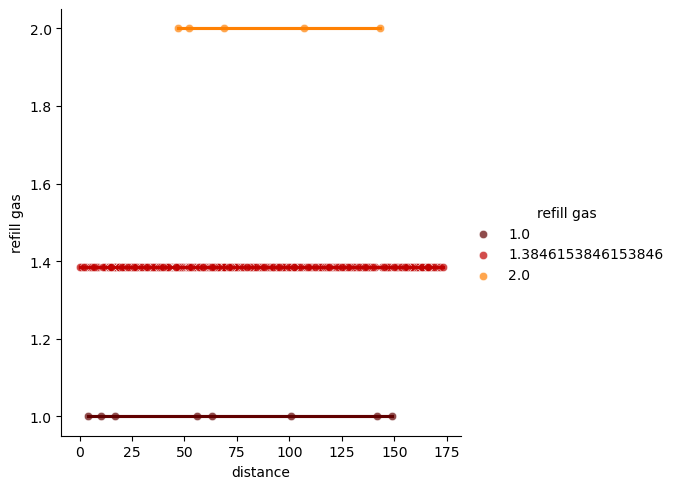

In [43]:
sns.lmplot(x = 'distance', y = 'refill gas', data = a, hue= 'refill gas',
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

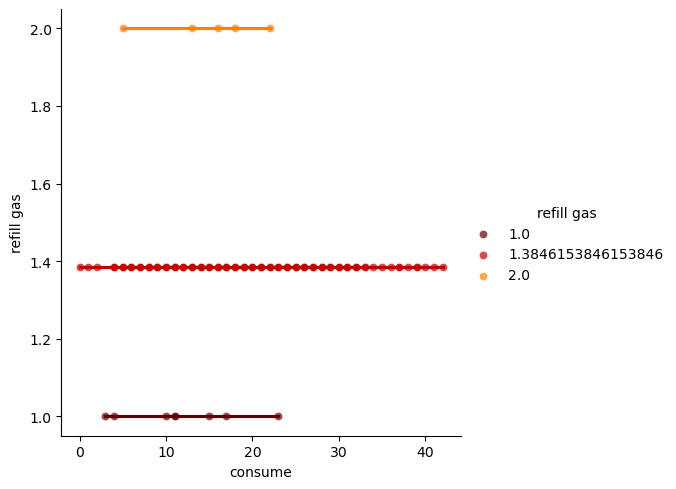

In [44]:
sns.lmplot(x = 'consume', y = 'refill gas', data = a, hue = 'refill gas', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

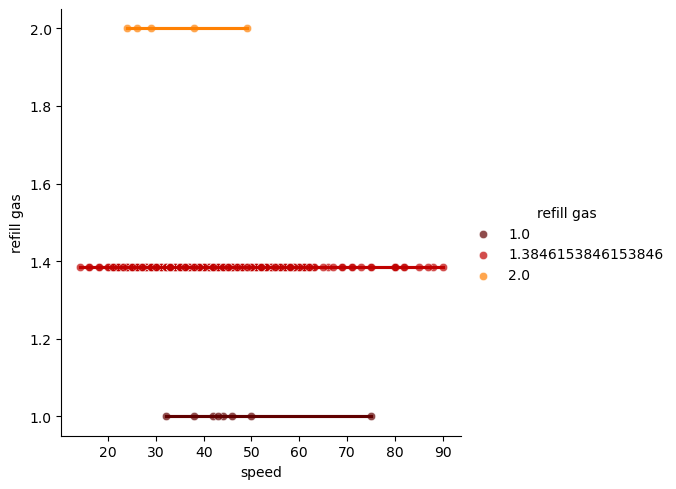

In [45]:
sns.lmplot(x = 'speed', y = 'refill gas', data = a, hue = 'refill gas', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

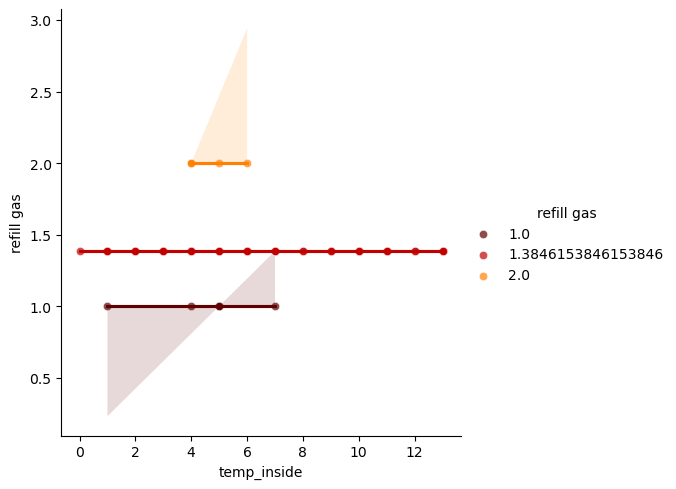

In [46]:
sns.lmplot(x = 'temp_inside', y = 'refill gas', data = a, hue = 'refill gas', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

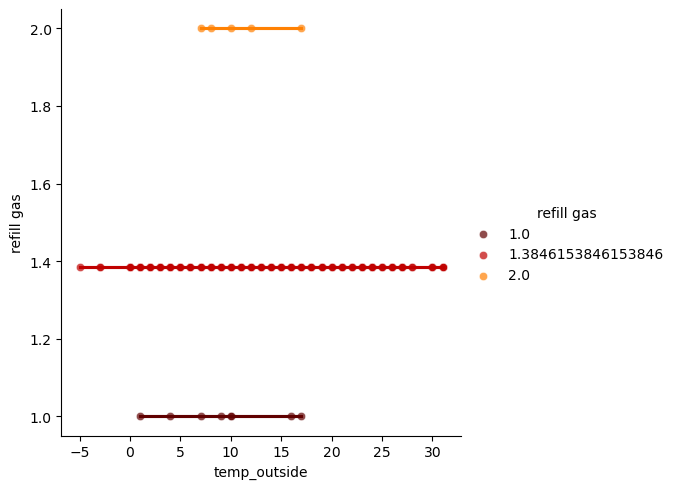

In [47]:
sns.lmplot(x = 'temp_outside', y = 'refill gas', data = a, hue = 'refill gas', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

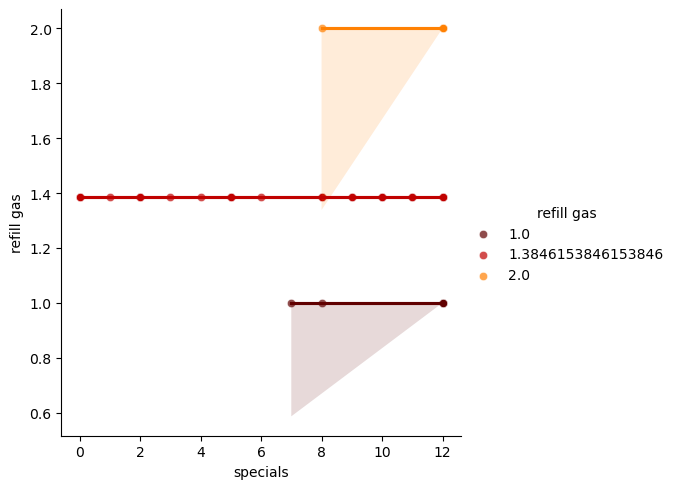

In [48]:
sns.lmplot(x = 'specials', y = 'refill gas', data = a, hue = 'refill gas', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

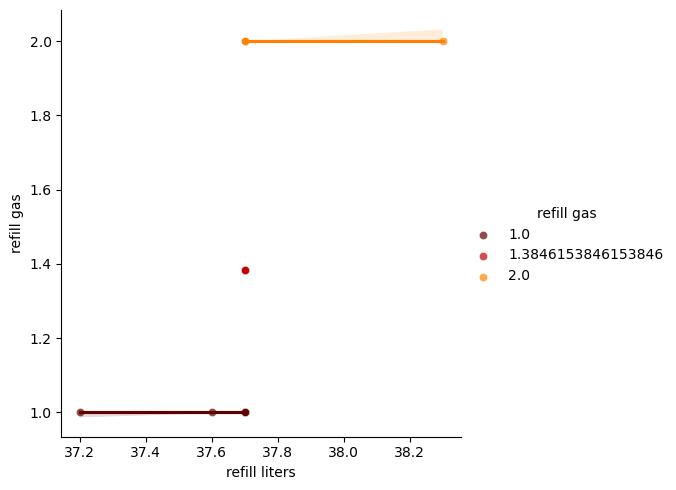

In [49]:
sns.lmplot(x = 'refill liters', y = 'refill gas', data = a, hue = 'refill gas', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

<AxesSubplot:>

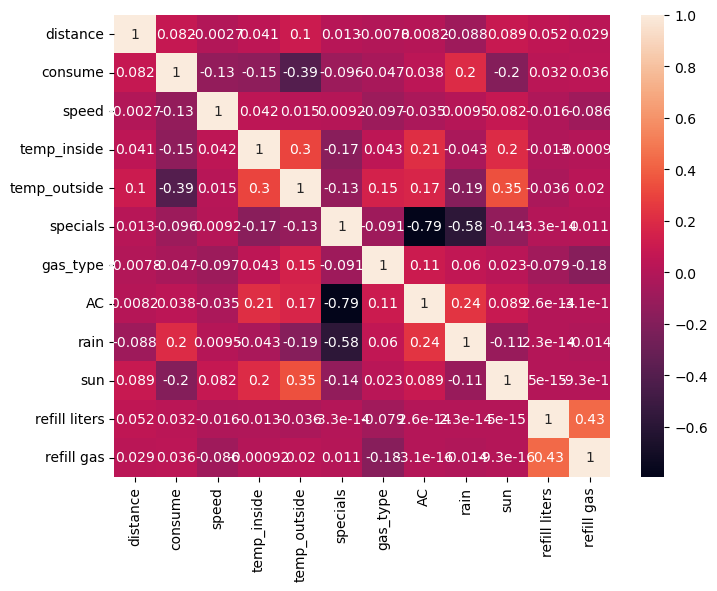

In [50]:
plt.figure(figsize = (8,6))
corr = a.corr()
sns.heatmap(corr, annot = True)

In [51]:
# splitting x(inputs) and y(outputs)

x=a.drop(['refill gas'],axis=1)
y=a['refill gas']
x

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters
0,107,18,26,4,12,12,0,0,0,0,37.7
1,16,10,30,4,13,12,0,0,0,0,37.7
2,9,23,38,4,15,12,0,0,0,0,37.7
3,25,7,36,4,14,12,0,0,0,0,37.7
4,65,13,46,4,15,12,0,0,0,0,37.7
...,...,...,...,...,...,...,...,...,...,...,...
383,46,5,39,10,18,12,1,0,0,0,37.7
384,47,11,38,11,31,0,1,1,0,0,37.7
385,46,6,45,11,19,12,1,0,0,0,37.7
386,42,14,42,11,31,0,1,1,0,0,37.7


In [52]:
y

0      2.000000
1      1.384615
2      1.384615
3      1.384615
4      1.384615
         ...   
383    1.384615
384    1.384615
385    1.384615
386    1.384615
387    1.384615
Name: refill gas, Length: 388, dtype: float64

In [53]:
# Training and Testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [54]:
# Preprocessing Steps

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(x_train)

x_train=scalar.fit_transform(x_train)
x_test-scalar.fit_transform(x_test)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters
223,95.499051,9.296504,55.158421,5.637064,11.031776,11.568855,-0.008584,0.270914,0.322139,0.305709,37.792848
313,11.195064,11.841886,38.374035,5.053373,16.205596,11.568855,-0.008584,0.270914,0.322139,0.305709,37.792848
302,52.366778,12.690346,45.833762,5.053373,5.857956,7.838374,-0.008584,-2.691206,0.322139,0.305709,37.792848
249,21.978132,11.841886,56.090887,5.637064,15.343293,10.503003,0.991489,0.270914,0.322139,-2.271085,37.792848
378,48.445663,12.690346,39.306501,7.971826,16.205596,7.838374,-0.008584,-2.691206,0.322139,0.305709,37.792848
...,...,...,...,...,...,...,...,...,...,...,...
241,60.209010,12.690346,36.509103,5.637064,11.894080,10.503003,0.991489,0.270914,0.322139,-2.271085,37.792848
276,47.465384,13.538807,32.779240,5.053373,17.930203,11.568855,-0.008584,0.270914,0.322139,0.305709,37.792848
212,31.780921,22.023413,31.846774,2.718611,9.307169,11.568855,-0.008584,0.270914,0.322139,0.305709,37.792848
162,150.394670,18.629570,69.145409,4.469682,3.271046,11.568855,0.991489,0.270914,0.322139,0.305709,37.792848


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [56]:
# Linear Regression model creation

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred
print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Absolute Percentage Error is',mean_absolute_percentage_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)
r2_score_lr=r2_score(y_test,y_pred)
print('r2_score is ',r2_score_lr)
mean_absolute_percentage_error_lr=mean_absolute_percentage_error(y_test,y_pred)
print('Mean Absolute Percentage Error is',mean_absolute_percentage_error_lr)

Mean Absolute Error is 0.5466289718223827
Mean Absolute Percentage Error is 0.40148454841852227
Mean Squared Error is 0.34496221098434665
Root Mean Square Error is 0.587334837196251
r2_score is  -32.60209357228793
Mean Absolute Percentage Error is 0.40148454841852227


In [57]:
# Creating Decision Tree Regression 

tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

y_pred=tree.predict(x_test)

print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)
r2_score_tree=r2_score(y_test,y_pred)
print('r2_score is ',r2_score_tree)
mean_absolute_percentage_error_tree=mean_absolute_percentage_error(y_test,y_pred)
print('Mean Absolute Percentage Error is',mean_absolute_percentage_error_tree)

Mean Absolute Error is 0.020381328073635765
Mean Squared Error is 0.010266525059424469
Root Mean Square Error is 0.10132386224095719
r2_score is  -4.210526315850949e-05
Mean Absolute Percentage Error is 0.01512163050624589


In [58]:
x = ['Linear Regression','Decision Tree']
y1 = [mean_absolute_percentage_error_lr,r2_score_lr]
y2 = [mean_absolute_percentage_error_tree,r2_score_tree]

trace1 = go.Bar(x = x, y = y1, name = 'Mean Absolute Percentage Error', marker = dict(color = 'cyan'))
trace2 = go.Bar(x = x, y = y2, name = 'Coefficient of determination', marker = dict(color = 'violet'))
data = [trace1,trace2]
layout = go.Layout(title = 'Performance Evaluation ', width = 750)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [59]:
a.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

<AxesSubplot:xlabel='refill gas', ylabel='rain'>

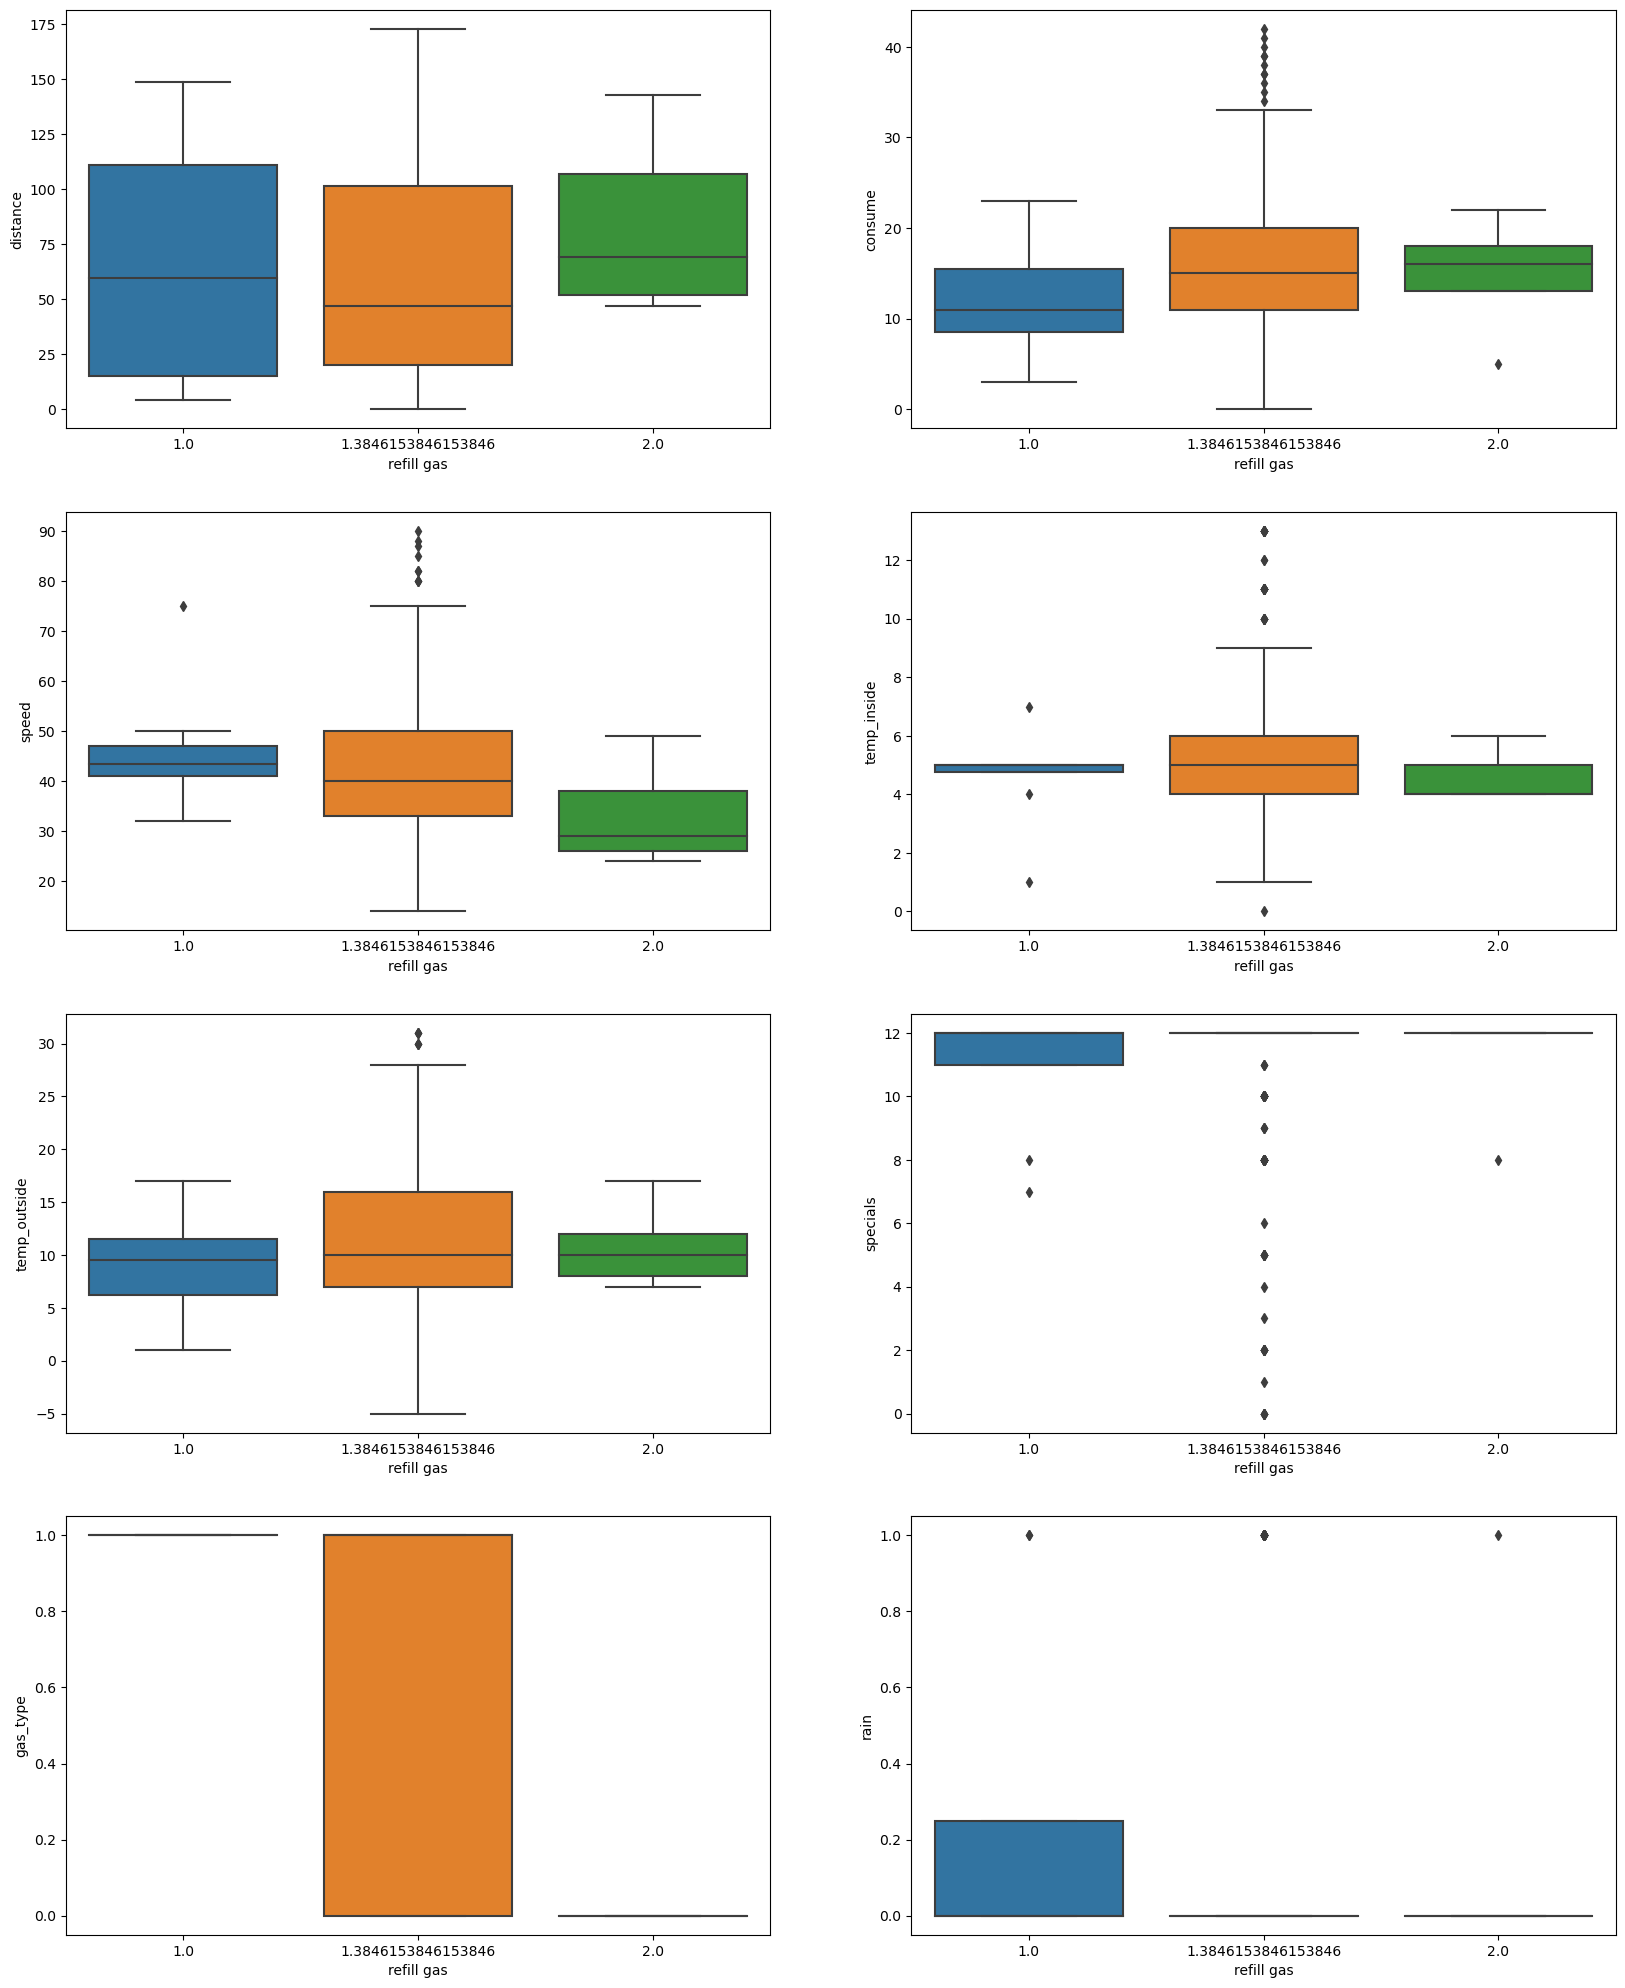

In [60]:
fig, axs = plt.subplots(4, 2, figsize=(20, 25))

sns.boxplot(x=a['refill gas'], y=a['distance'], ax=axs[0, 0])
sns.boxplot(x=a['refill gas'], y=a['consume'], ax=axs[0, 1])
sns.boxplot(x=a['refill gas'], y=a['speed'], ax=axs[1, 0])
sns.boxplot(x=a['refill gas'], y=a['temp_inside'], ax=axs[1, 1])
sns.boxplot(x=a['refill gas'], y=a['temp_outside'], ax=axs[2, 0])
sns.boxplot(x=a['refill gas'], y=a['specials'], ax=axs[2, 1])
sns.boxplot(x=a['refill gas'], y=a['gas_type'], ax=axs[3, 0])
sns.boxplot(x=a['refill gas'], y=a['rain'], ax=axs[3, 1])